# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

Some Pokemon have regional variants as such, their weight height were missing. In almost all of those cases those two measures barely differed from one another. I decided to fill the missing values by the average of the two variants.

In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
df['type2'].fillna('None', inplace = True) # no second type

In [4]:
df['percentage_male'].fillna(0, inplace = True) # genderless pokemon replaced with 0

In [5]:
df.drop('japanese_name', axis = 1, inplace=True)

In [6]:
df['is_legendary'].replace([0, 1], ['Non-legendary', 'Legendary'], inplace=True) # Change the labels 

# Plots

## Name length 

In [7]:
df['name_length'] = df['name'].apply(lambda x: len(str(x)))

Text(0.5, 0, 'Name length')

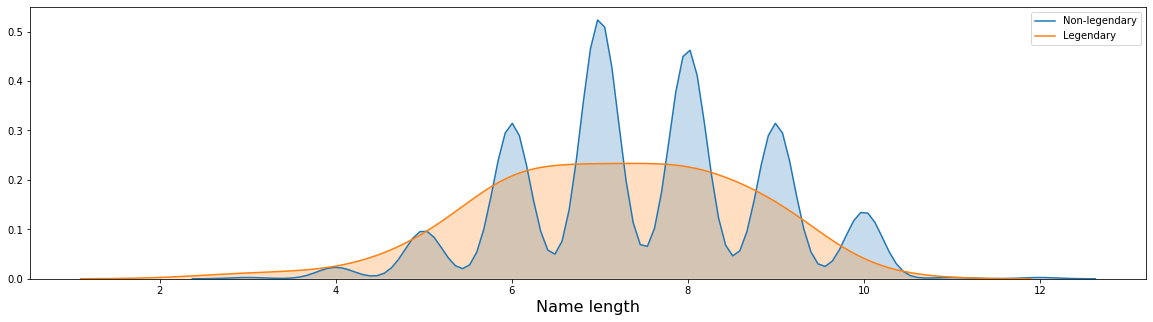

In [8]:
plt.figure(figsize=(20,5))
sns.kdeplot(df[df["is_legendary"]=='Non-legendary']["name_length"], shade = True, label = "Non-legendary")
sns.kdeplot(df[df["is_legendary"]=='Legendary']["name_length"], shade = True, label = "Legendary")
plt.xlabel('Name length', fontsize=16)

<Figure size 1440x360 with 0 Axes>

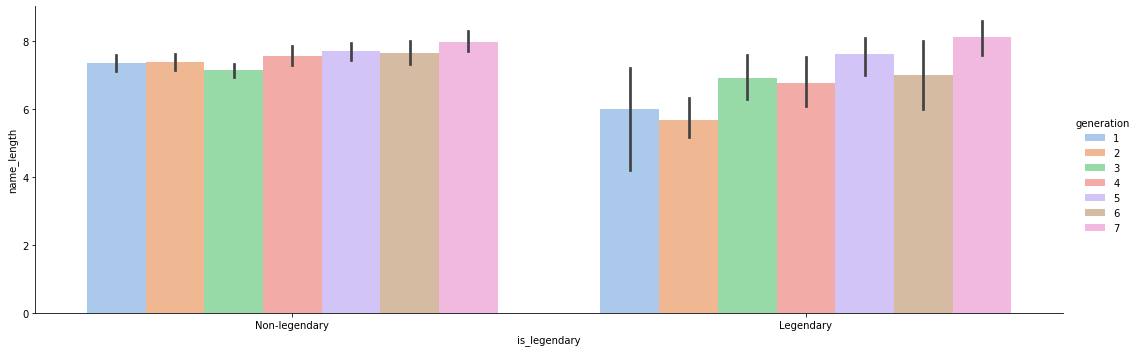

In [14]:
plt.figure(figsize=(20,5))
sns.catplot(x = "is_legendary", y = 'name_length', hue = 'generation', kind = 'bar', data = df, palette = 'pastel',height = 5, aspect = 3)

Name length is almost the same across all generations for non legendary pokemon. Whereas for legendary pokemon, generations 7 and 5 have the longest names.

In [15]:
df[df["is_legendary"]=='Non-legendary']["name_length"].describe()

count    731.000000
mean       7.496580
std        1.371301
min        3.000000
25%        7.000000
50%        7.000000
75%        8.000000
max       12.000000
Name: name_length, dtype: float64

In [16]:
df[df["is_legendary"]=='Legendary']["name_length"].describe()

count    70.000000
mean      7.142857
std       1.396535
min       3.000000
25%       6.000000
50%       7.000000
75%       8.000000
max      10.000000
Name: name_length, dtype: float64

Non legendary names are on average longer that legendary names

## Pokemon per generation

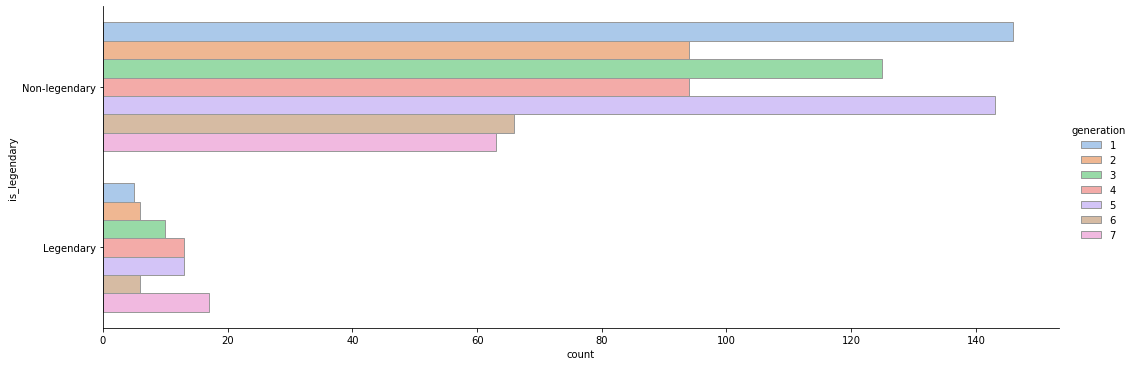

In [17]:
sns.catplot(y = "is_legendary", hue = "generation", kind = "count", palette = "pastel", edgecolor = ".6", data = df, height = 5, aspect = 3)

Generation 7 introduced the largest number of legendaries followed by generations 5 and 4. Conversely, generation 7 introduced the least number of non legendaries out of all 7 generations. Interesting to note, generation 5 ranks second after generation 1 for the number of non legendaries introduced but ranks first in the total number of new pokemon.

## First and second types

### First types total count

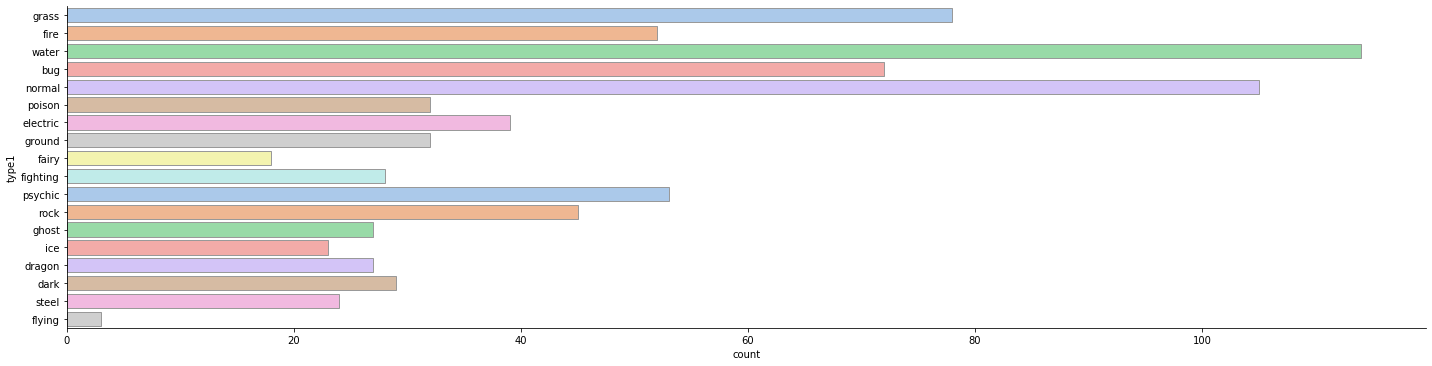

In [18]:
sns.catplot(y = "type1", kind = "count", palette = "pastel", edgecolor = ".6", data = df, height = 5, aspect = 4)

The most common first/main type is water. This could be a mirror of the real world; 71% of the Earth's surface is water-covered.

### Second types total count

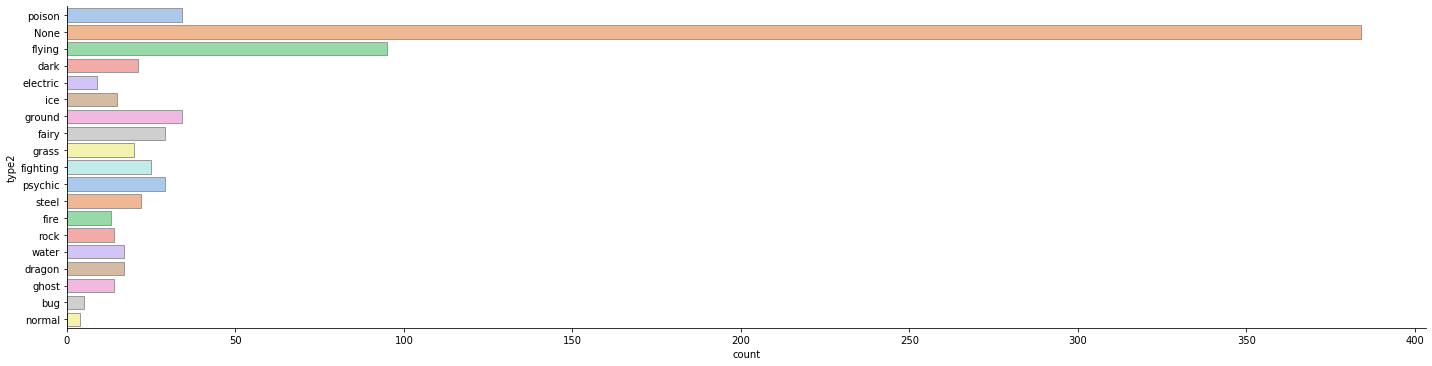

In [19]:
sns.catplot(y = "type2", kind = "count", palette = "pastel", edgecolor = ".6", data = df, height = 5, aspect = 4)

Most Pokemons do not have a second type. Out of the ones that do have a second type, flying is the most common. This could be a reference to the abudance of birds and insects on Earth.

### First types count among Pokemon

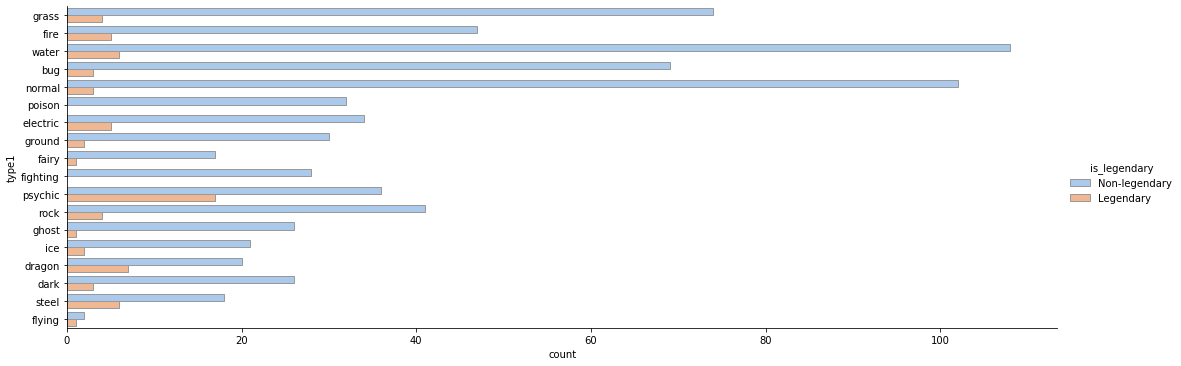

In [20]:
sns.catplot(y = "type1", hue = "is_legendary", kind = "count", palette = "pastel", edgecolor = ".6", data = df, height = 5, aspect = 3)

### Second types count among Pokemon

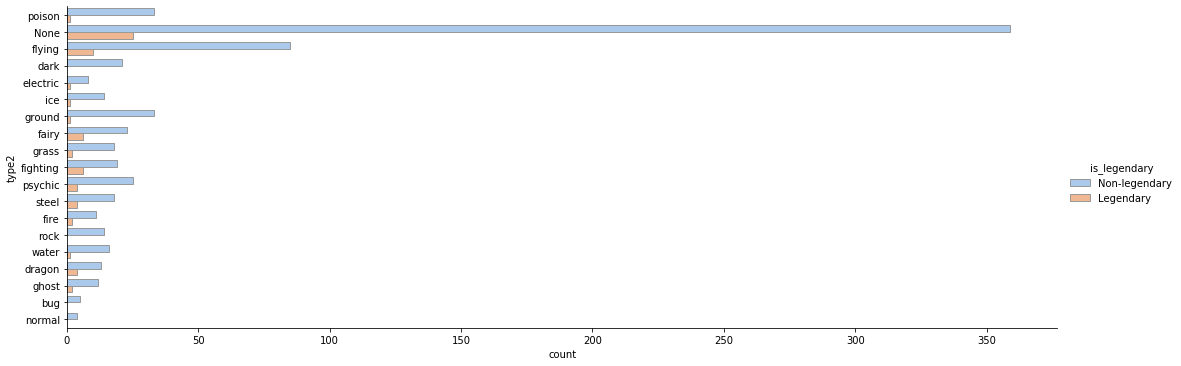

In [21]:
sns.catplot(y = "type2", hue = "is_legendary", kind = "count", palette = "pastel", edgecolor = ".6", data = df, height = 5, aspect = 3)

Most legendaries and non legendaries do not have a second type. The most common second type is flying for both classes of Pokemon.

## Height and weight

## Height

Text(0.5, 0, 'Height in meters')

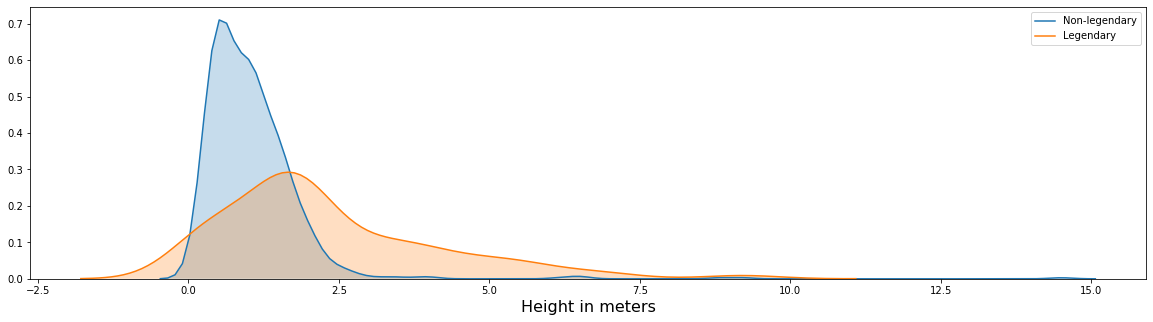

In [22]:
plt.figure(figsize=(20,5))
sns.kdeplot(df[df["is_legendary"]=='Non-legendary']["height_m"], shade = True, label = "Non-legendary")
sns.kdeplot(df[df["is_legendary"]=='Legendary']["height_m"], shade = True, label = "Legendary")
plt.xlabel('Height in meters', fontsize=16)

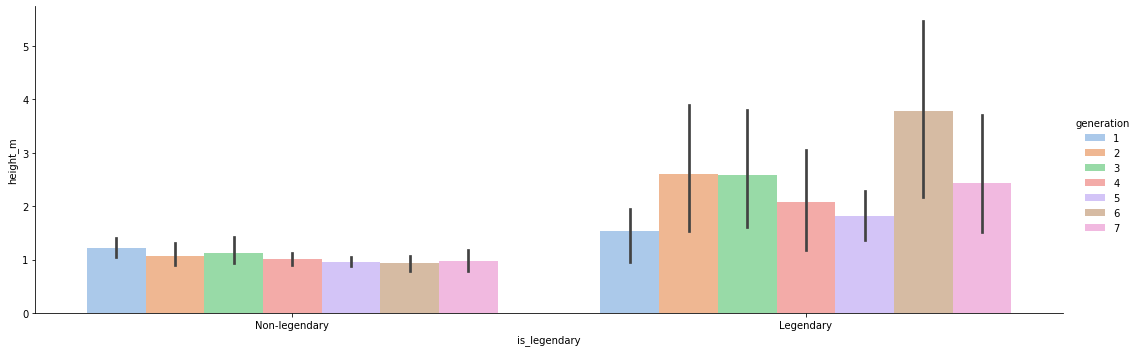

In [23]:
sns.catplot(x = "is_legendary", y = 'height_m', hue = 'generation', kind = 'bar', data = df, palette = 'pastel',height = 5, aspect = 3)

### Weight

Text(0.5, 0, 'Weight in kilograms')

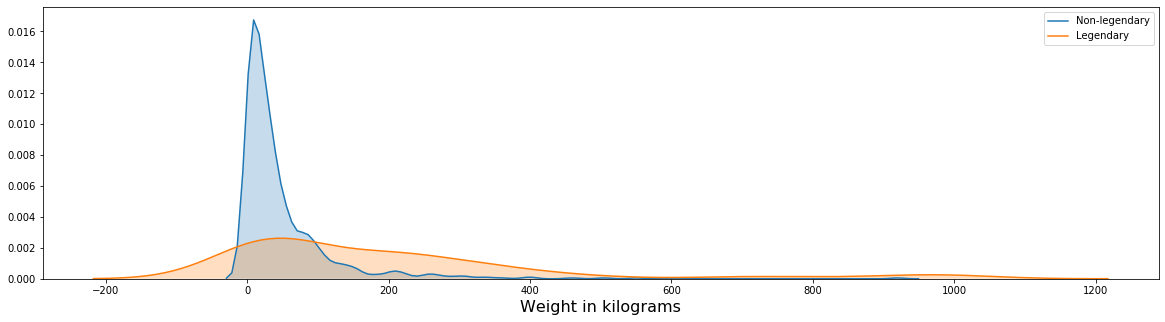

In [24]:
plt.figure(figsize=(20,5))
sns.kdeplot(df[df["is_legendary"]=='Non-legendary']["weight_kg"], shade = True, label = "Non-legendary")
sns.kdeplot(df[df["is_legendary"]=='Legendary']["weight_kg"], shade = True, label = "Legendary")
plt.xlabel('Weight in kilograms', fontsize=16)

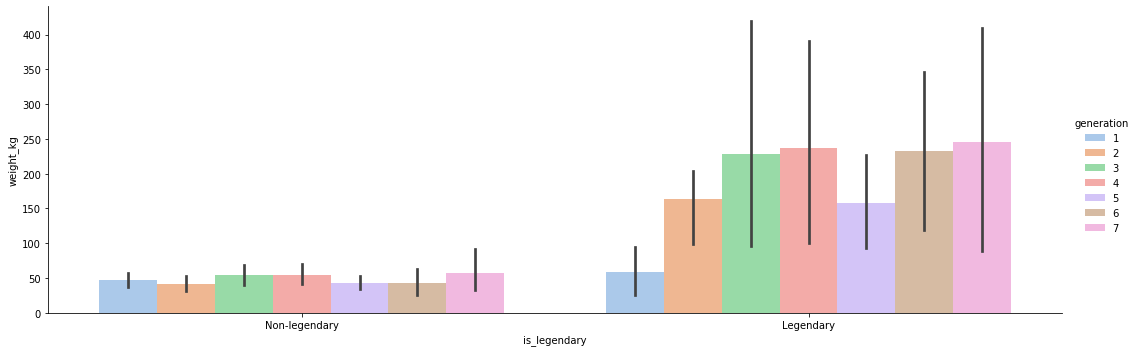

In [25]:
sns.catplot(x = "is_legendary", y = 'weight_kg', hue = 'generation', kind = 'bar', data = df, palette = 'pastel',height = 5, aspect = 3)